In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import healpy as hp
from matplotlib.collections import PolyCollection

In [2]:
def cartesian_to_spherical(xyz):
    """
    Convert Cartesian coordinates to spherical coordinates (longitude, latitude).
    
    Parameters:
    ----------
    xyz : numpy.ndarray
        Array of shape (n, 3) containing the (x, y, z) coordinates
        
    Returns:
    -------
    lon_lat : numpy.ndarray
        Array of shape (n, 2) containing the (longitude, latitude) coordinates in degrees
    """
    x, y, z = xyz.T
    
    # Calculate longitude and latitude
    lon = np.arctan2(y, x)
    lat = np.arcsin(z)
    
    # Convert to degrees
    lon_deg = np.degrees(lon)
    lat_deg = np.degrees(lat)
    
    return np.column_stack([lon_deg, lat_deg])


In [8]:

def plot_healpix_grid(nside=8, projection='orthographic', central_longitude=-60, 
                      central_latitude=30, figsize=(10, 10), color='blue', 
                      alpha=0.5, linewidth=0.5):
    """
    Create a HEALPix grid on a sphere, plotted using Cartopy.
    
    Parameters:
    -----------
    nside : int
        The HEALPix resolution parameter (must be a power of 2)
    projection : str
        Cartopy projection to use (e.g., 'orthographic', 'mollweide', 'robinson')
    central_longitude : float
        Central longitude for the projection (degrees)
    central_latitude : float
        Central latitude for the projection (degrees)
    figsize : tuple
        Figure size in inches
    color : str
        Color for grid lines
    alpha : float
        Transparency of grid lines (0-1)
    linewidth : float
        Width of grid lines
    
    Returns:
    --------
    fig, ax : matplotlib figure and axis objects
    """
    # Validate nside (must be power of 2)
    if np.log2(nside) % 1 != 0:
        raise ValueError("nside must be a power of 2")
    
    # Create figure and axis with specified projection
    proj_dict = {
        'orthographic': ccrs.Orthographic(central_longitude, central_latitude),
        'mollweide': ccrs.Mollweide(central_longitude=central_longitude),
        'robinson': ccrs.Robinson(central_longitude=central_longitude),
        'platecarree': ccrs.PlateCarree()
    }
    
    if projection not in proj_dict:
        raise ValueError(f"Projection '{projection}' not supported. Choose from: {list(proj_dict.keys())}")
    
    proj = proj_dict[projection]
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(1, 1, 1, projection=proj)
    
       # Create HEALPix grid
    npix = hp.nside2npix(nside)
    polygons = []
    
    # Get boundaries for each HEALPix pixel
    for ipix in range(npix):
        # Get the vertices (corners) of this pixelm = np.arange(NPIX)

        corners = hp.boundaries(nside, ipix, step=1, nest=False)
        # Convert vertices to lon/lat
        lon_lat = cartesian_to_spherical(corners.T)
        #print(lon_lat)
        
        polygons.append(lon_lat)
        
    
    # Plot the grid
    # Geodetic!! https://stackoverflow.com/questions/67730660/plotting-line-across-international-dateline-with-cartopy
    poly_collection = PolyCollection(polygons, facecolors='none', edgecolors=color, 
                                    linewidths=linewidth, transform=ccrs.Geodetic())
    ax.add_collection(poly_collection)
    ax.set_global() #Critical
    
    # Set title
    ax.set_title(f'HEALPix Grid', fontsize=14)

    plt.tight_layout() #For best results
    
    return fig, ax


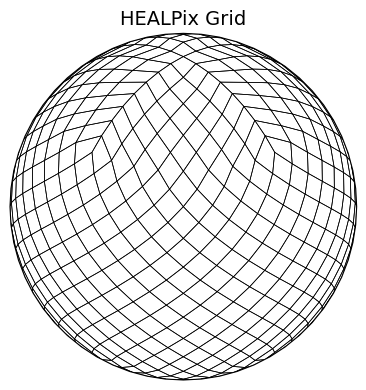

In [10]:
proj='orthographic'

fig, ax = plot_healpix_grid(
            nside=8,  # Resolution parameter
            projection=proj,
            central_longitude=45,
            central_latitude=30 if proj == 'orthographic' else 0,
            color='black',
            linewidth=0.5,
            figsize=(4,4),
        )
plt.savefig(f'healpix-grid.pdf')
plt.show()
